In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline

In [2]:
# load the pre-calculated cluster/super cluster assignments for all Kadist tagged works
df = pd.read_csv('results/kadist_assignments.csv')

# convert list coluumns to actual lists
for col in [
        'machine_tags', 'user_tags', 'user_superclusters_formatted', 
        'user_superclusters_no_scores','user_clusters_formatted', 'user_clusters_no_scores',
        'machine_superclusters_formatted', 'machine_superclusters_no_scores',
        'machine_clusters_formatted', 'machine_clusters_no_scores'
    ]:
    df[col] = df[col].apply(lambda x: literal_eval(x))

df.head()


,artist_name,description,artist_description,title,region,machine_tags,user_tags,image_url,thumbnail,permalink,...,user_clusters_no_scores,user_clusters_sum_of_scores,machine_superclusters_formatted,machine_superclusters_no_scores,machine_superclusters_sum_of_scores,machine_clusters_formatted,machine_clusters_no_scores,machine_clusters_sum_of_scores,superclusters_fmeasure,clusters_fmeasure
0,"Jennifer Allora, Guillermo Calzadilla",This series of photographs is part of the body...,Jennifer Allora and Guillermo Calzadilla compr...,Land Mark (Foot Prints) #12,Americas,"[land.n.01, machine.n.01, beach.n.01, island.n...","[demobilization.n.01, landscape.n.03, footprin...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/land-mark-foot-prints-12/,...,"[Arts, Inequality, Land]",6.730392,"[Cultural/35.45250843927315, Society/25.567108...","[Cultural, Society, Material_Physical]",85.211558,"[Arts/9.578871292106587, Land/8.36043956043956...","[Arts, Land, Space]",25.142608,0.666667,0.666667
1,Gabriel Kuri,Gabriel Kuri has created a series of works in ...,"Gabriel Kuri works from repurposed natural, in...",Untitled (Ticket Roll),Unspecified,"[elements.n.01, daily.s.01, specific.a.01, scu...","[everyday.s.03, ostentatious.a.01, juxtapositi...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/untitled-ticket-roll/,...,"[Immaterial, Time, Community]",2.800000,"[Cultural/13.652986066221365, Material_Physica...","[Cultural, Material_Physical, Society]",26.364097,"[Arts/9.029054442289736, Materiality/4.0692307...","[Arts, Materiality, Economy]",15.470080,0.666667,0.000000
2,Renee Rhodes,The artist writes about her work: “There is an...,Renée Rhodes grew up amidst the fantasy and ri...,Moving Clocks Change Rhythm,Americas,"[dance.n.01, body.n.01, virtual.s.01, space.n....","[map.v.02, choreography.n.02, perspective.n.02...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/moving-clocks-change-r...,...,"[Arts, Mind, Language]",9.007629,"[Individual_Personal/19.35500055500056, Cultur...","[Individual_Personal, Cultural, Material_Physi...",52.901874,"[Emotion/12.381618381618384, Space/7.235042735...","[Emotion, Space, Arts]",25.695583,0.666667,0.333333
3,Fiamma Montezemolo,Montemozolo writes of the work: “Fireflies is ...,"Born in Rome, Fiamma Montezemolo is both a cul...",Fireflies,Americas,"[consequence.n.01, frame.n.01, contemporary.s....","[survival.n.01, adjust.v.03, surprise.n.02, ca...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/fireflies/,...,"[Body, Time, Materiality]",5.898901,"[Material_Physical/6.594560994560995, Politics...","[Material_Physical, Politics, Individual_Perso...",14.863842,"[Geopolitics/3.2026143790849675, Time/2.611655...","[Geopolitics, Time, Materiality]",8.250167,0.666667,0.666667
4,Mladen Stilinovic,The Exploitation of the Dead cycle is composed...,Mladen Stilinovic’s work is based on social an...,Exploitation of the Dead,Europe,"[repeat.n.01, lose.v.01, sign.n.01, colors.n.0...","[obsoleteness.n.01, meaning.n.01, collection.n...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/exploitation-of-the-dead/,...,"[Arts, Design, Media]",4.255392,"[Individual_Personal/17.50339952445216, Cultur...","[Individual_Personal, Cultural, Material_Physi...",42.351358,"[Time/5.13986013986014, Values/5.1296703296703...","[Time, Values, Mind]",15.377223,1.000000,0.000000


# Breakdown by superclusters & clusters 


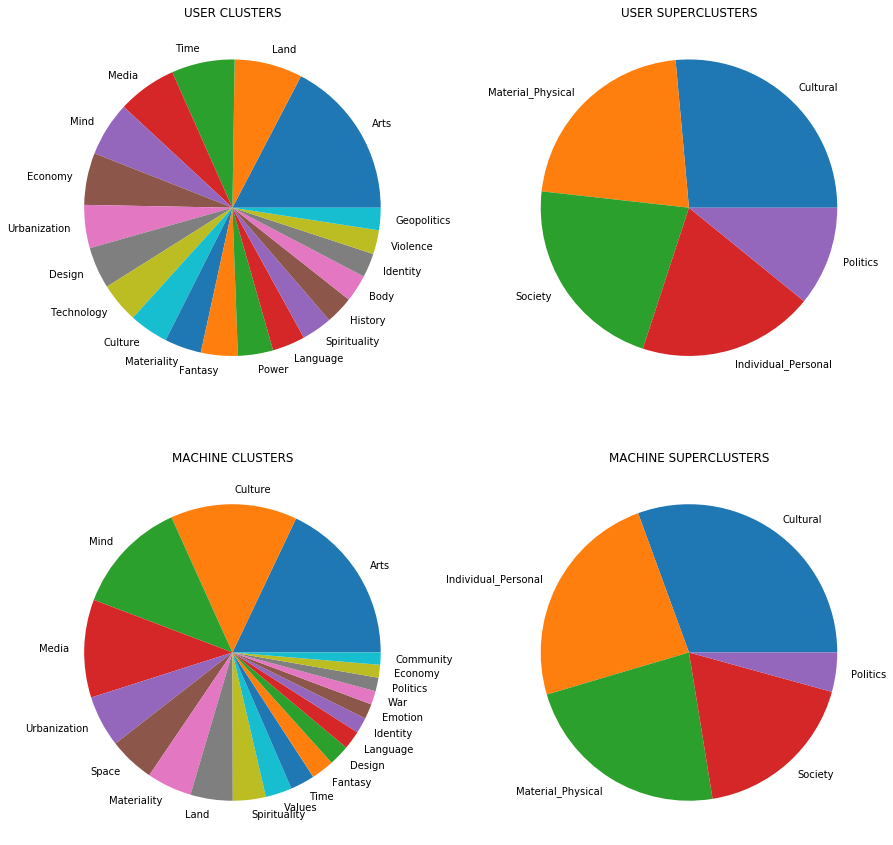

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

for i, tpe in enumerate(['user', 'machine']): 
    for j, cluster_type in enumerate(['clusters', 'superclusters']):
        axs[i,j].axis('off')
        axs[i,j].set_title("{} {}".format(tpe, cluster_type).upper())

        pd.Series(df['{}_{}_no_scores'.format(tpe, cluster_type)].sum()).value_counts()[:20].plot.pie(ax=axs[i,j]);


# F-Measure Score Distribution

clusters mean f-measure: 0.24767103347889374 hit percentage: 55.223880597014926
superclusters mean f-measure: 0.6781659388646288 hit percentage: 97.01492537313433


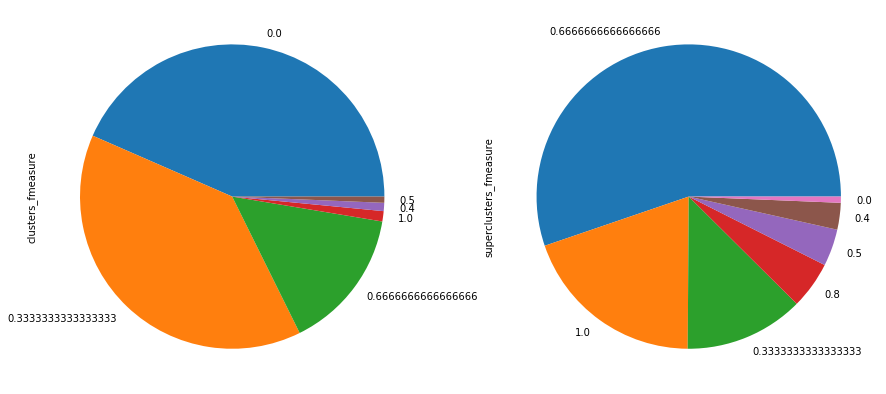

In [4]:
fig, axs = plt.subplots(1,2, figsize=(15,7.5))
for j, cluster_type in enumerate(['clusters', 'superclusters']):
    df['{}_fmeasure'.format(cluster_type)].value_counts().plot.pie(ax=axs[j]);

for j, cluster_type in enumerate(['clusters', 'superclusters']):
    s = df['{}_fmeasure'.format(cluster_type)]
    print(cluster_type, 
          'mean f-measure:', 
          s.mean(),
          'hit percentage:',
          100*s.where(s>0).count()/len(s)
    )


# Analysis of poor performing tags

Most popular tags that produce low cluster scores, ie have low affinity to any cluster

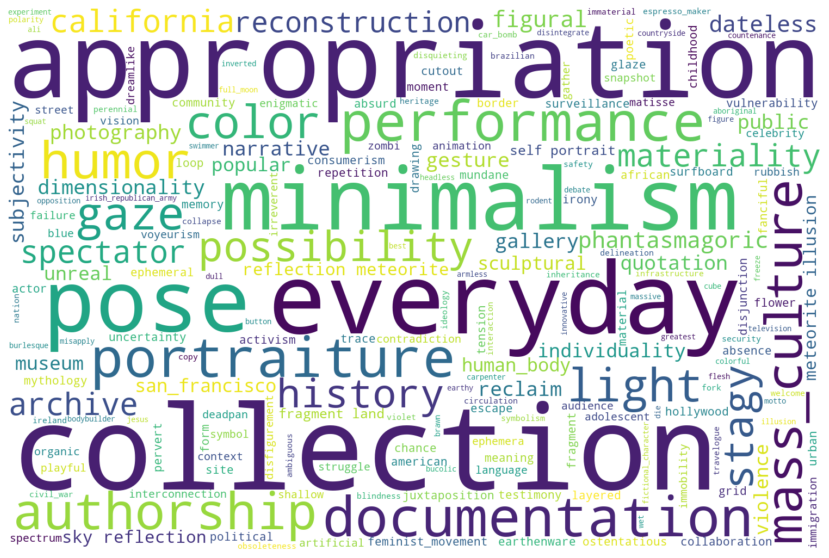

In [5]:
df_low_corr_works = df[df.user_clusters_sum_of_scores < df.user_clusters_sum_of_scores.mean()/1.414]

tags = df_low_corr_works.user_tags.sum()

wc = WordCloud(
    background_color='white',
    colormap = 'viridis',
    width=1500, 
    height=1000, 
    random_state=42).generate(' '.join([x.split('.')[0] for x in tags]))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
pd.Series(tags).value_counts().head(15)

collection.n.01        9
appropriation.n.03     9
everyday.s.03          7
pose.n.02              6
documentation.n.01     6
minimalism.n.01        6
portraiture.n.02       6
mass_culture.n.01      5
authorship.n.02        5
humor.n.04             5
spectator.n.01         4
stagy.s.01             4
fragment.n.01          4
phantasmagoric.s.01    4
california.n.01        4
dtype: int64

# Artists that are cluster outliers

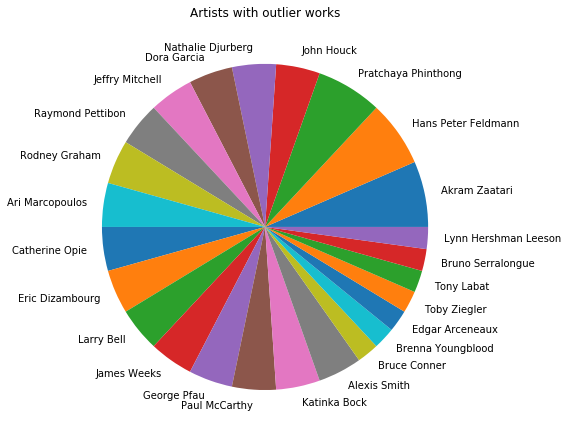

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5,7.5))

ax1.axis("off")
ax1.set_title('Artists with outlier works')

df_low_corr_works.artist_name.value_counts()[:25].plot.pie(ax=ax1);

In [8]:
df_low_corr_works.artist_name.value_counts()

Akram Zaatari          3
Hans Peter Feldmann    3
Pratchaya Phinthong    3
John Houck             2
Nathalie Djurberg      2
                      ..
Karla Black            1
Setareh Shahbazi       1
Gareth Moore           1
Hank Willis Thomas     1
Pascal Shirley         1
Name: artist_name, Length: 120, dtype: int64

## Average clusters_fmeasure by region

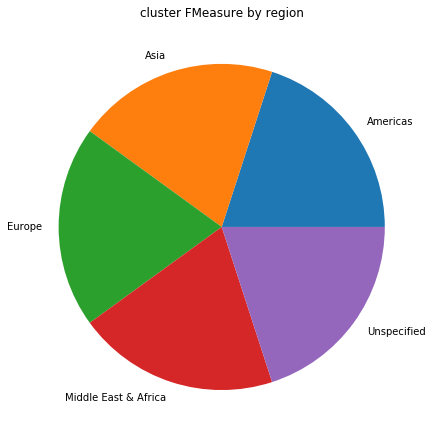

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(7.5,7.5))

ax1.axis("off")
ax1.set_title('cluster FMeasure by region')

means = df['clusters_fmeasure'].groupby(df.region).mean()
means.value_counts().plot.pie(ax=ax1, labels=means.index);

In [26]:
df.shape

(469, 24)

In [29]:
df.dropna(subset=['clusters_fmeasure']).sort_values(by=['clusters_fmeasure']).tail(25)

,artist_name,description,artist_description,title,region,machine_tags,user_tags,image_url,thumbnail,permalink,...,user_clusters_no_scores,user_clusters_sum_of_scores,machine_superclusters_formatted,machine_superclusters_no_scores,machine_superclusters_sum_of_scores,machine_clusters_formatted,machine_clusters_no_scores,machine_clusters_sum_of_scores,superclusters_fmeasure,clusters_fmeasure
332,Köken Ergun,The Battle of Karbala was a military engagemen...,"Born in Istanbul, in 1976, Köken Ergun studied...",Ashura,Middle East & Africa,"[battle.n.01, performance.n.01, state.n.04, is...","[islam.n.02, culture.n.06, ritual.n.02, commem...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/untitled-21/,...,"[Spirituality, Culture, Land]",11.309989,"[Society/27.284230965113323, Cultural/21.64276...","[Society, Cultural, Individual_Personal]",68.114542,"[Culture/8.591849816849816, Spirituality/8.052...","[Culture, Spirituality, War]",21.897375,1.000000,0.666667
328,Kiran Subbaiah,Flight Rehearsals focuses on Subbaiah’s desire...,"Born in Sidpur and living in Bangalore, Kiran ...",Flight Rehearsals,Asia,"[attempt.n.01, desire.n.01, human.a.01, space....","[ambition.n.01, distortion.n.05, repetition.n....",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/flight-rehearsals/,...,"[Emotion, Culture, Physics]",11.438462,"[Individual_Personal/20.567698967698977, Socie...","[Individual_Personal, Society, Cultural]",39.752681,"[Emotion/12.381618381618384, Culture/3.9648351...","[Emotion, Culture, Spirituality]",19.603596,0.666667,0.666667
319,Adelita Husni-Bey,Postcards from the Desert Island is a remake o...,"Born in Milan, Italian-Libyan Adelita Husni-Be...",Postcards from the Desert Island,Europe,"[child.n.01, island.n.01, public.a.01, movie.n...","[experiment.v.01, child.n.01, self-government....",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/postcards-from-the-des...,...,"[Arts, Power, Media]",8.995171,"[Cultural/12.385373123608419, Material_Physica...","[Cultural, Material_Physical, Politics]",31.444453,"[Land/4.34065934065934, Arts/4.323809523809523...","[Land, Arts, Media]",11.992247,0.666667,0.666667
306,Marwa Arsanios,Carlton Hotel project is the second part of a ...,"Marwa Arsanios is born in 1978 in Washington, ...",Carlton Hotel project,Americas,"[undertaking.n.01, iconic.a.01, architectural....","[transformation.n.05, bayrut.n.01, curtain.n.0...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/carlton-hotel-project/,...,"[Arts, Urbanization, Design]",10.170588,"[Society/10.182045895281188, Cultural/7.809426...","[Society, Cultural, Individual_Personal]",24.426338,"[Arts/6.209426847662142, Urbanization/5.280672...","[Arts, Urbanization, Land]",14.714936,0.666667,0.666667
300,Haig Aivazian,This work is part of an ongoing project that l...,Haig Aivazian was born in 1980 in Beirut. As a...,"At every sunset, I think of you. Not because o...",Middle East & Africa,"[light.n.01, distance.n.01, contrast.n.01, com...","[stadium.n.01, nationalism.n.02, violence.n.01...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/every-sunset/,...,"[Mind, Values, Arts]",7.192760,"[Individual_Personal/18.17992038920832, Cultur...","[Individual_Personal, Cultural, Politics]",32.791814,"[Mind/6.707692307692308, Values/5.953199741435...","[Mind, Values, Culture]",16.730123,0.666667,0.666667
298,Ming Wong,Making Chinatown (2012) is a remake of Roman P...,Ming Wong’s practice has a profound connection...,Making Chinatown,Unspecified,"[movie.n.01, space.n.01, line.n.01, music.n.01...","[reenactment.n.01, hollywood.n.01, dislocation...",https://kadist.org/wp-content/uploads/2016/04/...,http

In [27]:
df.sort_values(by=['clusters_fmeasure']).tail(25)

,artist_name,description,artist_description,title,region,machine_tags,user_tags,image_url,thumbnail,permalink,...,user_clusters_no_scores,user_clusters_sum_of_scores,machine_superclusters_formatted,machine_superclusters_no_scores,machine_superclusters_sum_of_scores,machine_clusters_formatted,machine_clusters_no_scores,machine_clusters_sum_of_scores,superclusters_fmeasure,clusters_fmeasure
261,Jeff Wall,"As suggested by its title, Pipe Opening (2002)...",Internationally renowned photoconceptualist Je...,Pipe Opening,Americas,"[wall.n.01, details.n.01, daily.s.01, fictiona...","[reality.n.02, enigmatic.s.01, absence.n.01, i...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/pipe-opening/,...,"[Materiality, Mind, Immaterial]",5.406593,"[Cultural/21.11014328808447, Material_Physical...","[Cultural, Material_Physical, Individual_Perso...",44.079862,"[Culture/6.217948717948718, Materiality/4.9501...","[Culture, Materiality, Mind]",15.959341,1.000000,0.666667
260,Ian Wallace,Untitled (Breathless) presents a folded newspa...,"British-born and Vancouver-based, Ian Wallace ...",Untitled (Breathless),Americas,"[paper.n.01, medium.n.01, movie.n.01, tool.n.0...","[cut.n.02, utilitarian.s.01, juxtaposition.n.0...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/untitled-breathless/,...,"[Media, Arts, Technology]",15.147205,"[Cultural/32.49250341162107, Material_Physical...","[Cultural, Material_Physical, Individual_Perso...",39.253046,"[Arts/12.450019751490343, Media/11.92875816993...","[Arts, Media, Design]",29.159170,0.333333,0.666667
258,Mario Ybarra Jr.,Ammo Bunker (2009) is a multipart installation...,Mario Ybarra Jr. belongs to a generation of Me...,Ammo Bunker,Americas,"[war.n.01, wall.n.01, history.n.01, beach.n.01...","[monument.n.02, inscription.n.01, chicano.n.01...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/ammo-bunker/,...,"[Urbanization, Design, Arts]",7.679841,"[Society/16.96390292713822, Material_Physical/...","[Society, Material_Physical, Individual_Personal]",32.799312,"[Land/5.864327485380116, Urbanization/4.781929...","[Land, Urbanization, Arts]",14.157154,0.666667,0.666667
237,John Gutmann,Gutmann’s photographs Untitled Nob Hill and Fr...,"Upon arriving in the United States, German-bor...",From the North Tower of the Golden Gate Bridge...,Americas,"[san_francisco.n.01, iconic.a.01, photograph.n...","[golden_gate_bridge.n.01, view_angle.n.01, mod...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/from-the-north-tower-o...,...,"[Arts, Land, Urbanization]",9.918053,"[Cultural/8.286161387631976, Material_Physical...","[Cultural, Material_Physical, Society]",21.876883,"[Urbanization/6.296044031647746, Land/4.780392...","[Urbanization, Land, Mind]",13.472041,1.000000,0.666667
230,William E. Jones,"In the early 20th century, the Hercules Engine...",Los Angeles-based artist and filmmaker William...,"Hercules Engines, Abandoned, Canton, Ohio",Americas,"[production.n.01, architectural.a.01, degree.n...","[regeneration.n.01, depression.n.02, abandonme...",https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/wp-content/uploads/2016/04/...,https://kadist.org/work/hercules-engines-aband...,...,"[Arts, Power, Urbanization]",11.430845,"[Cultural/12.57272394787875, Politics/10.98021...","[Cultural, Politics, Society]",29.999098,"[Arts/5.2487420474262585, Politics/4.738461538...","[Arts, Politics, Power]",13.064127,1.000000,0.666667
227,Kan Xuan,"In four-channel video Island, a series of obje...","Experimenting with painting, photography, perf...",Island,Asia,"[ocular.a.02, object.n.01, island.n.01, produc...","[commodity.n.01, mass_production.n.01, domesti...",https://kadist.org/wp-content/uploads/2016/04/...,https